# Web-Scraping mit BeautifulSoup

## Einführung Scraping

„Scraping“ bedeutet im Englischen soviel wie „schaben“ oder „kratzen”. Unter dem Oberbegriff sind Techniken zusammengefasst, mit denen Daten aus Webseiten oder Dokumenten extrahiert – oder, um bei der wörtlichen Übersetzung zu bleiben, „herausgeschabt“ – werden, um sie weiterzuverarbeiten.

Der kanadische Datenjournalist Glen McGregor bezeichnet Scraping als mächtiges Werkzeug, um an elektronische Daten für Geschichten heranzukommen, die sonst nicht realisierbar wären (siehe http://j-source.ca/article/web-scraping-how-journalists-get-their-own-data).

Scrapen kann auf verschiedenste Art und Weise geschehen: Die mächtigste Möglichkeit besteht darin, selbst ein Programm zu erstellen, das in der Lage ist, Webseiten systematisch nach den gewünschten Informationen zu durchsuchen.

Und hier kommt das ** Web-Scraping mit Python und BeautifulSoup** ins Spiel.

Web Scraping ist die automatische Extraktion von Daten in einem Format, das man leicht für Analysen und weitere Bearbeitungen nutzen kann. Im Prinzip erleichtert es das Abholen von dynamischen Daten einer Seite.

## Anwendungsbeispiele

- Finanzmarkt (Preis-/Wertvergleiche über Zeit)
- E-Mail Adressen 
- Produktbewertungen (Vergleich zur Konkurenz)
- massive Datenmengen für Forschungen
- ...

### Hinweis:

**Ich möchte an dieser Stelle darauf hinweisen, dass Scraping Techniken auch missbraucht werden können, indem Inhalte fremder Webseiten gegen den Willen des Anbieters kopiert und auf einem eigenen Server angeboten werden.**



# Erste Schritte


Wir werden **Python** als unsere "kratzende" Sprache verwenden, zusammen mit einer einfachen und leistungsstarken Bibliothek, **BeautifulSoup**.
(Das Vorhandensein von Python setze ich hier vorraus)

### Installation von BeautifulSoup in Jupyter

Das aktuelle Package heisst *BeautifulSoup**4*** und wird (z.B. im Anaconda Prompt) wie folgt installiert:


> $ pip install beautifulsoup4   

Sollte die aktuelle Versionsnummer vergessen werden, wird BeautifulSoup in der Vorgängerversion 3 installiert.

Bei Problemen oder für weitere Hinweise siehe [Link zur Website](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) der Entwickler.


## Wiederholung

Bevor wir anfangen uns mit dem Code zu beschäftigen, hier eine kurze Wiederholung der Grundlagen in HTML und einige Regeln des Scrapings.

### HTML-Tags

Wenn Sie bereits die Grundlagen von HTML-Tags kennen, fühlen Sie sich frei, diesen Teil zu überspringen.

```
<!DOCTYPE html>  
<html>  
    <head>
    </head>
    <body>
        <h1> First Scraping </h1>
        <p> Hello World </p>
    <body>
</html>
```

### Grundlegende Syntax einer HTML-Webseite 
Jeder `<tag>` dient einem Block innerhalb der Webseite:
1. `<! DOCTYPE html>` : HTML-Dokumente müssen mit einer Typdeklaration beginnen.
2. Das HTML-Dokument ist zwischen `<html>` und `</ html>` enthalten.
3. Die Meta- und Script-Deklaration des HTML-Dokuments liegt zwischen `<head>` und `</ head>`.
4. Der sichtbare Teil des HTML-Dokuments liegt zwischen `<body>` und  `</ body>`.
5. Titelüberschriften werden mit den Tags `<h1>` bis `<h6>` definiert.
6. Die Absätze werden mit dem `<p>`-Tag definiert.

Es gibt noch andere nützliche Tags wie `<a>` für Hyperlinks, `<table>` für Tabellen, mit `<tr>` für Zeilen und `<td>` für Spalten.

Auch HTML-Tags kommen manchmal mit *id* und *class* als Attribute. Das `id`-Attribut gibt eine eindeutige ID für ein HTML-Tag an und der Wert muss innerhalb des HTML-Dokuments eindeutig sein. Das Klassenattribut wird verwendet, um gleiche Stile für HTML-Tags mit derselben Klasse zu definieren. Wir können diese `id`s und `class`es nutzen, die Daten zu finden, die wir extrahieren wollen.

Weitere Informationen zu HTML-Tags, ID und Klasse finden Sie unter [W3Schools](https://www.w3schools.com/).

### Scraping Regeln

1. Sie sollten die Nutzungsbedingungen einer Webseite gründlich lesen, bevor Sie dort "scrapen", gerade in Bezug zu der rechtlichen Nutzung von Daten (keine kommerzielle Nutzung).
2. Ihr Programm nicht zu aggressiv nutzen (auch bekannt als Spamming), kann unter Umständen auch zum Server-/Systemabsturz führen. Vergewissern Sie sich, dass sich Ihr Programm in einer vernünftigen Weise verhält (d.h. wirkt wie ein Mensch - Bsp: eine Anfrage für eine Webseite pro Sekunde).
3. Das Layout einer Webseite kann sich von Zeit zu Zeit ändern. Es bietet sich an, die Webseite vorher erneut zu besuchen und ggf. Ihren Code nach Bedarf neuzuschreiben bzw. abzuändern.

Weitere Beispiele und ein kurzer Überblick kann [hier](https://www.seo-book.de/onpage/richtig-scrapen-legal-legitim-und-seo-konform) gefunden werden.

# Anwendung: einfaches Web-Scraping
## Inspektion der Website

Schauen wir uns zunächst diese [Seite](https://www.bloomberg.com/quote/EURUSD:CUR) mit dem aktuellen Wechselkurs  Euro € zu US-Doller $.

![title](img/Tut1.png)

Mit Rechtsklick auf den Wechselkurs, können wir diesen näher untersuchen (hier am Beispiel unter Nutzung von Google Chrome):

![title](img/Tut2.png)

Hier finden wir die einzelnen HTML-Level mit den Klassen, in der auch unser Wert steht.
```
<div class="basic-quote"> → <div class="price-container up"> → <div class="price">`
```
Auf dem selben Weg finden wir auch den dazugehörigen Namen:
```
<h1 class="name"> EURUSD Spot Exchange Rate </h1>
```


![title](img/Tut3.png)

Jetzt kennen wir den Standort der gewünschten Daten (obwohl in diesem Fall Bloomberg keine `id` verwendet) mit Hilfe der `class`-Attribute.

## Der erste Code

Da wir jetzt alle nötigen Informationen kennen, können wir uns dem Coding des Web-Scrapers widmen.

Zunächst benötigen wir folgenden Bibliotheken:

In [1]:
import requests
from bs4 import BeautifulSoup

Als nächstes deklarieren wir eine Variable für die gewünschte URL der Website:

In [2]:
URL = 'https://www.bloomberg.com/quote/EURUSD:CUR'

Und nutzen `Python requests`, um die HTML-Seite der URL zu erhalten und prüfen anschließend den Status.

> **Hinweis**: 

> falls nicht installiert: ```$ pip install requests``` (z.B. im Anaconda Prompt)

In [3]:
page = requests.get(URL)

In [4]:
page.status_code

200

Der `status_code 200` bedeutet, dass die Seite erfolgreich heruntergeladen wurde, desweiteren hat `requests` auch ein eingebautes Objekt zum Überprüfen des Statuscodes:


> **Hinweis**:

> Startet der Code mit `2` → Erfolgsversprechend

> Fängt er hingegen mit einer `4` oder `5` an → Fehler

In [5]:
page.status_code == requests.codes.ok

True

> Zum Vergleich liefert
> 
```
bad_r = requests.get('http://httpbin.org/status/404')
bad_r.status_code == requests.codes.ok
```
als Ergebnis `404` und damit ein `False`

Weiter in unserem Code können wir mit Hilfe von BeautifulSoup die vom Server erhaltenen Daten in der entsprechenden Sprache [parsen](https://de.wikipedia.org/wiki/Parser) und in einer Variable speichern:

In [6]:
soup = BeautifulSoup(page.text, 'html.parser')

> **Hinweis**: 

> An dieser Stelle können auch andere Parser genutzt werden (Beispiele: 'xml','lxml', 'html5lib'), näheres dazu im  Abschnitt "Tipps: Fortgeschrittene Scraping Techniken".

Mittels BeautifulSoup Anweisung `find()` können wir auf die eingangs gesuchten Informationen zugreifen:

In [7]:
name_box = soup.find('h1', attrs={'class': 'name'})
print(name_box)

<h1 class="name"> EURUSD Spot Exchange Rate </h1>


Und holen uns nur den Text:

> mit `strip()` wird nur der Text innnerhalb der `tags` übergeben (Leerzeichen zwischen den `tags` und dem Inhalt werden entfernt).

In [8]:
name = name_box.text.strip()
print(name)

EURUSD Spot Exchange Rate


Auf dem selben Weg finden wir den Wert des Wechselkurses:

In [9]:
price_box = soup.find('div', attrs={'class':'price'})  
price = price_box.text
print(price)

1.1219


Für eine weitere Bearbeitung empfiehlt es sich, die gesammelten Werte (z.B. über einen längeren Zeitraum) zu exportieren und auch zu speichern:

In [10]:
import csv  
from datetime import datetime 

In [11]:
with open('EURUSD.csv', 'a') as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow([name, price, datetime.now()])

Falls dieser Code regelmässig genutzt wird, erhalten Sie den Wert ohne groß auf der Webseite stöbern zu müssen bzw. auch ganz ohne ablenkende Werbeeinblendungen.

## Mögliche Probleme beim Encoding
siehe auch Dokumentation zu [BS4](https://www.crummy.com/software/BeautifulSoup/bs4/doc).

Das erzeugte `BeautifulSoup`-Objekt selbst repräsentiert das Dokument als Ganzes, für die meisten Zwecke kann man es als `<tag>`-Objekt behandeln, also in der Baumstruktur navigieren und suchen. Da unter Umständen das `BeautifulSoup`-Objekt nicht einem aktuellen HTML- oder XML-Standard-`<tag>`entspricht (z.B. keine Attribute), ist es sicher sinnvoll sich ersteinmal den Namen anzuschauen.

In [12]:
markup = b"<h1>\xed\xe5\xec\xf9</h1>"
soup = BeautifulSoup(markup, 'html.parser')

soup.name

'[document]'

In [13]:
soup.h1

<h1>νεμω</h1>

`BeautifulSoup` konvertiert automatisch in den Unicode, dies funktioniert auch meistens, in den anderen Fällen kann es aber zu Problemen führen. Obiges Beispiel als solches ist zu kurz, als das `BeautifulSoup` es korrekt identifiziert. Es wird fälschlicherweise als `ISO-8859-7` erkannt.

In [14]:
soup.original_encoding

'iso-8859-7'

In [15]:
soup.h1

<h1>νεμω</h1>

Mit folgender Anweisung können wir in die korrekte Form parsen:

In [16]:
soup = BeautifulSoup(markup, 'html.parser', from_encoding="iso-8859-8")
soup.h1

<h1>םולש</h1>

In [17]:
soup.original_encoding

'iso-8859-8'

Sollte das Encoding nicht bekannt sein, Sie aber dennoch wissen, dass es sich um Unicode handelt, können Sie mit foglender Anweisung die falschen ausschliessen:

In [18]:
soup = BeautifulSoup(markup, 'html.parser', exclude_encodings=["ISO-8859-7"])
soup.h1

<h1>íåìù</h1>

In [19]:
soup.original_encoding

'windows-1252'

Windows-1252 ist nicht zu 100% korrekt, aber da es sich um einen kompatiblen [*Superset*](https://en.wikipedia.org/wiki/Subset) von ISO-8859-8 handelt ist es nah dran.

### Nützliches zum Navigieren mit HTML-`<tag>`:


```
# ohne Beispiel
soup.head		
soup.title
soup.body
soup.a
soup.find_all('a') #show all links
soup.find("a", id="id-value") # find that unique link

```

# weitere Anwendung: _multiple_ Werte


Sollte ein einzelner abgerufener Wert nicht ausreichen, so können Sie auch mehrere zur gleichen Zeit abrufen.

Dazu ändern wir zunächst unsere `URL` Variable in ein Array ab.

In [20]:
URL = ['https://www.bloomberg.com/quote/EURUSD:CUR', 
       'https://www.bloomberg.com/quote/EURGBP:CUR', 
       'https://www.bloomberg.com/quote/EURCHF:CUR']

Dann nur noch den Extraktions-Code in eine Schleife verwandeln, die jede einzelne URL nacheinander abarbeitet und die abgerufenen Werte als Tupel speichert.

In [21]:
# for loop
data = []  
for pg in URL:  
    page = requests.get(pg)

    soup = BeautifulSoup(page.text, 'html.parser')

    name_box = soup.find('h1', attrs={'class': 'name'})
    name = name_box.text.strip()

    price_box = soup.find('div', attrs={'class':'price'})
    price = price_box.text

    data.append([name, price])

Zusätzlich nur noch die Ausgabe verändern...

In [22]:
with open('index.csv', 'a') as csv_file:  
    writer = csv.writer(csv_file)
    for name, price in data:
        writer.writerow([name, price, datetime.now()])

### Anleitung für automatisches Web-Scraping unter Windows10

#### Anwendung: multiple Werte

`1.` Folgender Code wurde in einer *.py Datei gespeichert: (`script.py`)
```python
# Code aus multiple Werte (s.o.)
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime

URL = ['https://www.bloomberg.com/quote/EURUSD:CUR', 
       'https://www.bloomberg.com/quote/EURGBP:CUR', 
       'https://www.bloomberg.com/quote/EURCHF:CUR']

data = []
for pg in URL:  
    page = requests.get(pg)
    soup = BeautifulSoup(page.text, 'html.parser')
    name_box = soup.find('h1', attrs={'class': 'name'})
    name = name_box.text.strip()
    price_box = soup.find('div', attrs={'class':'price'})
    price = price_box.text
    data.append([name, price])
    
with open('autoindex.csv', 'a') as csv_file:  
    writer = csv.writer(csv_file)
    for name, price in data:
        writer.writerow([name, price, datetime.now()])
```
`2.` eine einfach BATCH-Datei wurde erstellt: (`startpy.bat`)
```batch
python script.py
exit
```

`3.` Programm "Aufgabenplanung" starten

`4.` Unter Aktionen "Einfache Aufgabe erstellen..." und im Assistent folgende Angaben machen:

> - Name eingeben, ggf. zusätzliche Beschreibung

> - Trigger, wann die Aufgabe gestartet werden soll

> - Aktion: Programm starten

> - folgendes Bild könnte jetzt hilfreich sein:

> ![title](img/autoscraping.png)


> **Eingabe bei A:** (Dateipfad / Start der Eingabeaufforderung)

> `C:\Windows\System32\cmd.exe` 

> **Eingabe bei B:** (Syntax für Ausführung der BATCH-Datei)

> `/c start "" "startpy.bat`

> **Eingabe bei C:** (Dateipfad aus dem gestartet wird - sinnvoller Tipp: Nehmen Sie den Pfad in dem ihre Batch-Datei liegt und auch die spätere CSV-Datei gespeichert wird.)

> `C:\Ihr Verzeichnis\...\Web-Scraping...` "
 

`5.` Fertigstellen

Nun sollte das Programm in der Aufgabenplanung korrekt starten und alsbald regelmäßig Daten liefern. Im folgendem Abschnitt eine mögliche Datenvisualisierung der bisher gesammelten Wechselkurse.

#### Zusatz: Visualisierung der Daten

In [24]:
from ggplot import *
import numpy as np
import pandas as pd

In [25]:
cols = ['Wechselkurs', 'Wert', 'Zeit']
index_csv = pd.read_csv('autoindex.csv', sep=',', header=None, names=cols)
index_csv['Zeit'] = pd.to_datetime(index_csv['Zeit'])
index_csv.tail()

,Wechselkurs,Wert,Zeit
13,EURGBP Spot Exchange Rate,0.88183,2017-06-13 12:00:04.384708
14,EURCHF Spot Exchange Rate,1.08434,2017-06-13 12:00:04.384708
15,EURUSD Spot Exchange Rate,1.12100,2017-06-14 00:00:13.483158
16,EURGBP Spot Exchange Rate,0.87892,2017-06-14 00:00:13.483158
17,EURCHF Spot Exchange Rate,1.08594,2017-06-14 00:00:13.483158


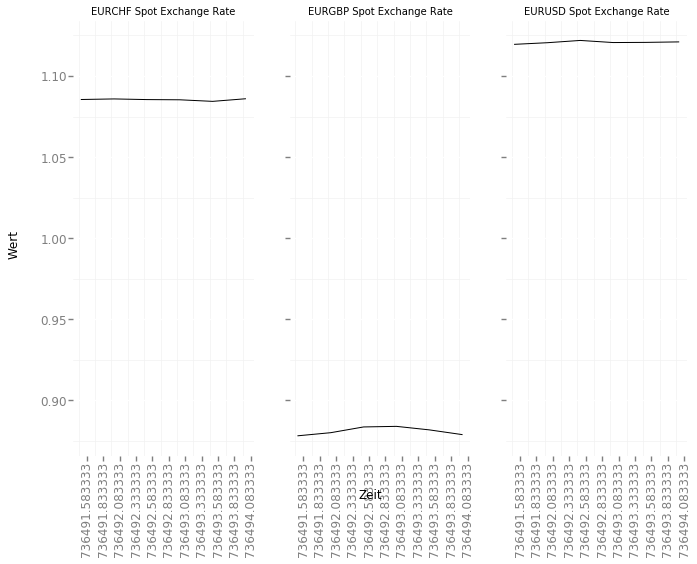

<ggplot: (-9223371898668455827)>

In [26]:
ggplot(index_csv, aes('Zeit', 'Wert')) + \
    geom_line() + \
    facet_wrap('Wechselkurs', ncol=3) + \
    scale_x_date(date_labels = "%Y/%m/%d") + \
    theme(axis_text_x  = element_text(angle = 90)) + \
    theme_bw()

# Anwendungbeispiel: 
# Sammeln aller Artikel einer "Main-Page"
## am Beispiel dieser [Webseite](http://www.blog.pythonlibrary.org)

In [27]:
URL = 'http://www.blog.pythonlibrary.org/'

page = requests.get(URL)

soup = BeautifulSoup(page.text, 'html.parser')

pages = soup.findAll('h1')

articles = {i.a['href']: i.text.strip()
                for i in pages if i.a}

for article in articles:
    s = '{title}: {url}'.format(
    title=articles[article],
    url=article)
    print(s)

ANN: Boomslang XML: http://www.blog.pythonlibrary.org/2017/06/12/ann-boomslang-xml/
PyDev of the Week: Amir Rachum: http://www.blog.pythonlibrary.org/2017/06/12/pydev-of-the-week-amir-rachum/
wxPython: Working with Status Bars: http://www.blog.pythonlibrary.org/2017/06/06/wxpython-working-with-status-bars/
PyDev of the Week: Andrew Godwin: http://www.blog.pythonlibrary.org/2017/06/05/pydev-of-the-week-andrew-godwin/
PyDev of the Week: Terry Peppers: http://www.blog.pythonlibrary.org/2017/05/29/pydev-of-the-week-terry-peppers/
PyDev of the Week: Harrison Kinsley: http://www.blog.pythonlibrary.org/2017/05/22/pydev-of-the-week-harrison-kinsley/
PyCon 2017 Videos are Up: http://www.blog.pythonlibrary.org/2017/05/21/pycon-2017-videos-are-up/
Python 2017 – Second Day: http://www.blog.pythonlibrary.org/2017/05/21/python-2017-second-day/
PyCon 2017 – First Day Impressions: http://www.blog.pythonlibrary.org/2017/05/19/pycon-2017-first-day-impressions/
Educative Python Courses on Sale for PyCon!

# Anwendungsbeispiel: Extraktion einer Tabelle

Als finales Beispiel widmen wir uns etwas größeren Daten und extrahieren eine Tabelle bei [Wikipedia](http://de.wikipedia.org/wiki/Liste_der_Gro%C3%9F-_und_Mittelst%C3%A4dte_in_Deutschland). Hier nehmen wir uns die zweite und größere Tabelle vor, sie beinhaltet Daten wie Rang, Name, Einwohnerzahlen, usw. der Groß- und Mittelstädte Deutschlands mit mehr als 20.000 Einwohnern.

In [28]:
url = "http://de.wikipedia.org/wiki/Liste_der_Gro%C3%9F-_und_Mittelst%C3%A4dte_in_Deutschland"
header = {'User-Agent': 'Mozilla/5.0'} # needed to prevent 403 error on Wikipedia

page = requests.get(url, headers=header)

soup = BeautifulSoup(page.text, 'xml')

tables = soup.find_all('table')
#print(tables)

#### Folgende Codeblöcke (1. bis 3.) dienen nur der Indentifizierung unserer gesuchten Tabelle:

In [29]:
# 1. Codeblock
tables = soup.find_all("table", {"class": "wikitable sortable zebra"})
# print(tables)

In [30]:
# 2. Codeblock (Inhalt der gefundenen Tabellen - hier jeweils die ersten 2 Zeilen)
for table in tables:
    print(table.contents[:7])

['\n', <caption>Groß- und Mittelstädte nach Bundesland</caption>, '\n', <tr class="hintergrundfarbe6">
<th>Land</th>
<th>Groß-<br/>
städte</th>
<th>Mittel-<br/>
städte</th>
<th>gesamt</th>
</tr>, '\n', <tr>
<td style="text-align:left"><a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a></td>
<td>29</td>
<td>180</td>
<td>209</td>
</tr>, '\n']
['\n', <caption>Groß- und Mittelstädte nach Einwohnerzahl</caption>, '\n', <tr class="hintergrundfarbe6">
<th>Rang</th>
<th>Name</th>
<th>1970</th>
<th>1980</th>
<th>1990</th>
<th>2000</th>
<th>2010</th>
<th data-sort-type="number">2015</th>
<th>Bundesland</th>
</tr>, '\n', <tr>
<td>1.</td>
<td align="left"><a href="/wiki/Berlin" title="Berlin">Berlin</a></td>
<td>3.208.719</td>
<td>3.048.759</td>
<td>3.433.695</td>
<td>3.382.169</td>
<td>3.460.725</td>
<td>3.520.031</td>
<td align="left">Berlin</td>
</tr>, '\n']


In [31]:
# 3. Codeblock (für faule Spaltenzähler)
count = []
for i, row in enumerate(soup.findAll("tr")):
    cells = row.findAll("td")
    count.append(len(cells))

count[:30]

[0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

Da die gewünschte Tabelle 9 Spalten hat, erzeugen wir zunächst 9 leere Listen:

In [32]:
rang = []
name = []
jahr1970 = []
jahr1980 = []
jahr1990 = []
jahr2000 = []
jahr2010 = []
jahr2015 = []
bundesland = []

Und iterieren über jede Zeile und hängen die einzelnen Zellen in ihrer Reihenfolge an die jeweilige Liste an:

In [33]:
for row in soup.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) == 9:
        rang.append(cells[0].find(text=True))
        name.append(cells[1].find(text=True))
        jahr1970.append(cells[2].find(text=True))
        jahr1980.append(cells[3].find(text=True))
        jahr1990.append(cells[4].find(text=True))
        jahr2000.append(cells[5].find(text=True))
        jahr2010.append(cells[6].find(text=True))
        jahr2015.append(cells[7].find(text=True))
        bundesland.append(cells[8].find(text=True))

Und führen anschliessend alle Listen in einen `panda DataFrame` zusammen und vergeben noch Spaltenüberschriften:

In [34]:
tabelle = pd.DataFrame(data=[rang, name, jahr1970, jahr1980, jahr1990, jahr2000, jahr2010, jahr2015, bundesland]).transpose()
tabelle.columns  = ['Rang', 'Name', '1970', '1980', '1990', '2000', '2010', '2015', 'Bundesland']
tabelle.head()

,Rang,Name,1970,1980,1990,2000,2010,2015,Bundesland
0,1.,Berlin,3.208.719,3.048.759,3.433.695,3.382.169,3.460.725,3.520.031,Berlin
1,2.,Hamburg,1.793.640,1.645.095,1.652.363,1.715.392,1.786.448,1.787.408,Hamburg
2,3.,München,1.311.978,1.298.941,1.229.026,1.210.223,1.353.186,1.450.381,Bayern
3,4.,Köln,849.451,976.694,953.551,962.884,1.007.119,1.060.582,Nordrhein-Westfalen
4,5.,Frankfurt am Main,666.179,629.375,644.865,646.550,679.664,732.688,Hessen


# Tipps: Fortgeschrittene Scraping Techniken

`BeautifulSoup` ist einfach und großartig für kleinere Web-Scraping-Aktionen. Falls Sie an größeren Datenmengen interessiert sind, können Sie sich auch andere Alternativen zu Nutze machen:

1\. [`Scrapy`](https://scrapy.org/) oder [Selenium](http://www.seleniumhq.org/) - sind weitere nützliche Python Bibliotheken und **sehr** mächtig.

2\. Nutzen Sie in Ihrem Code öffentliche Programmierschnittstellen (APIs). Die Effizienz ist um einiges höher als beim "scrapen" von Webseiten.

> Beispiel: [`Facebook Graph API`](https://developers.facebook.com/docs/graph-api?locale=de_DE) (hilfreich bei versteckten Daten, die nicht auf der Facebook-Webseite dargestellt werden)

> Beispiele für Wikipedia API-tools sind [hier zu finden](https://www.mediawiki.org/wiki/API:Client_code#Python)

3\. Überlegen Sie sich den Einsatz einer Datenbank (wie mySQL, SQLite), um Ihre Daten zu speichern, empfehlenswert bei größeren Datenmengen.

4\. HTML-Parsing: der genutzte `html.parser` ist in Python vorhanden, benötigt man schnelleres, so kann man auch [lxml](http://lxml.de/) installieren und nutzen.

### API: Kleiner Zusatz für eine Wikipedia Einbindung in Python:

In [35]:
import wikipedia  # Hinweis: $ pip install wikipedia

In [36]:
wikipedia.search("Python")

['Python',
 'PYTHON',
 'Monty Python',
 'Python (programming language)',
 'Burmese python',
 'Python molurus',
 'Python (missile)',
 'Ball python',
 'Python curtus',
 'African rock python']

In [37]:
py = wikipedia.page("Monty Python")
py.title

'Monty Python'

In [38]:
py.url

'https://en.wikipedia.org/wiki/Monty_Python'

In [39]:
py.content[:500]

"Monty Python (also known as The Pythons) were a British surreal comedy group who created their sketch comedy show Monty Python's Flying Circus, which first aired on the BBC in 1969. Forty-five episodes were made over four series. The Python phenomenon developed from the television series into something larger in scope and impact, including touring stage shows, films, numerous albums, several books, and musicals. The Pythons' influence on comedy has been compared to the Beatles' influence on musi"

In [40]:
py.summary[:100]

'Monty Python (also known as The Pythons) were a British surreal comedy group who created their sketc'

In [41]:
py.links[:15]

['13681 Monty Python',
 '3rd Rock from the Sun',
 '9617 Grahamchapman',
 '9618 Johncleese',
 '9619 Terrygilliam',
 '9620 Ericidle',
 '9621 Michaelpalin',
 '9622 Terryjones',
 'A Fish Called Wanda',
 "A Liar's Autobiography",
 "A Liar's Autobiography: The Untrue Story of Monty Python's Graham Chapman",
 'A Poke In The Eye (With A Sharp Stick)',
 'Absolutely Anything',
 'Agnès Varda',
 'Air Canada']

# Bemerkung

Der Name `BeautifulSoup` kommt von *"Alice im Wunderland"*. Es ist ein Lied, das von "Mock Turtle" an Alice gesungen wird: 

> "Soo--oop of the e--e--evening. Beautiful, beautiful Soup!"

Es ist eine Anspielung auf "tag soup" - der Begriff bezieht sich auf fehlerhaften HTML-Code. 

→ `<tag soup>`  ist der natürliche Feind des Web-Scrapings.

# Quellen & weitere Literatur
http://investigativ.org/kapitel-4/daten-sammeln-zusammenschaufeln-und-sie-nutzbar-machen-scraping-und-data-mining-hinweise-und-tipps-von-patrick-roesing/

http://altitudelabs.com/blog/web-scraping-with-python-and-beautiful-soup/

https://de.wikipedia.org/wiki/Screen_Scraping

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

https://www.blog.pythonlibrary.org/2016/08/04/a-simple-intro-to-web-scraping-with-python/